<a href="https://colab.research.google.com/github/omoknooni/reinforcement_study/blob/main/openai_cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Rendering Dependencies
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get update
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
# Gym Dependencies
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install gym[box2d] > /dev/null 2>&1

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done


In [7]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 41 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [8]:
from pyvirtualdisplay import Display
import random

display = Display(visible=0, size=(1400, 900))
display.start()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To mainta

Action: 1, Reward: 1.0, State: [-0.00144278  0.23093374  0.04022504 -0.27800876], Total Reward: 1.0
Action: 1, Reward: 1.0, State: [ 0.0031759   0.42545944  0.03466487 -0.5577383 ], Total Reward: 2.0
Action: 0, Reward: 1.0, State: [ 0.01168509  0.22986846  0.0235101  -0.25433865], Total Reward: 3.0
Action: 1, Reward: 1.0, State: [ 0.01628246  0.42464697  0.01842333 -0.53951436], Total Reward: 4.0
Action: 0, Reward: 1.0, State: [ 0.0247754   0.22927095  0.00763304 -0.24108389], Total Reward: 5.0
Action: 1, Reward: 1.0, State: [ 0.02936081  0.42428303  0.00281137 -0.5313494 ], Total Reward: 6.0
Action: 1, Reward: 1.0, State: [ 0.03784648  0.61936533 -0.00781562 -0.82314515], Total Reward: 7.0
Action: 1, Reward: 1.0, State: [ 0.05023378  0.8145933  -0.02427853 -1.118276  ], Total Reward: 8.0
Action: 0, Reward: 1.0, State: [ 0.06652565  0.6197982  -0.04664405 -0.8333066 ], Total Reward: 9.0
Action: 1, Reward: 1.0, State: [ 0.07892161  0.8155254  -0.06331018 -1.1402864 ], Total Reward: 10.0

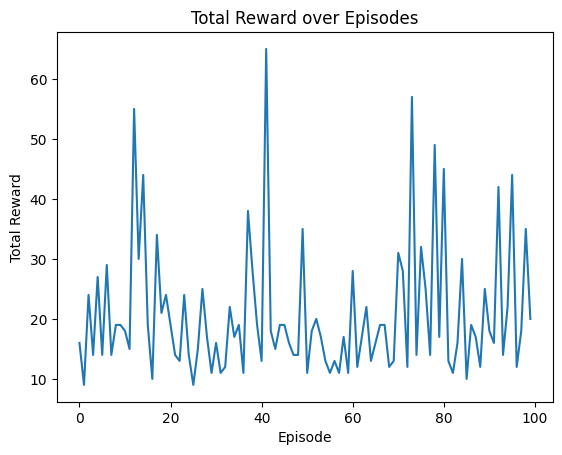

In [9]:
import gym
import matplotlib.pyplot as plt

# 환경 초기화
env = gym.make('CartPole-v0')

# 누적 보상을 저장할 리스트
rewards = []

for episode in range(100):  # 100 에피소드 진행
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        env.render()  # 환경을 화면에 표시

        # 무작위로 행동 선택
        action = env.action_space.sample()

        # 선택한 행동을 환경에 적용
        next_state, reward, done, _ = env.step(action)
        total_reward += reward

        # 선택한 액션, 보상, 환경 상태, 누적 리워드 출력
        print(f"Action: {action}, Reward: {reward}, State: {next_state}, Total Reward: {total_reward}")

        state = next_state

    rewards.append(total_reward)

env.close()

# 누적 보상 시각화
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward over Episodes')
plt.show()
